In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', 50)

stud = pd.read_csv('/Users/Tony/Anton test/stud_math.csv')

display(stud.head(50))
stud.info()   # trying to familiarize with data . numeric columns - 13, string columns - 17

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [106]:
pd.DataFrame(stud.school.value_counts(dropna=False)) # check data in every column


,school
GP,349
MS,46


In [107]:
pd.DataFrame(stud.sex.value_counts(dropna=False))

,sex
F,208
M,187


In [108]:
pd.DataFrame(stud.age.value_counts(dropna=False)) # more students age 16

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

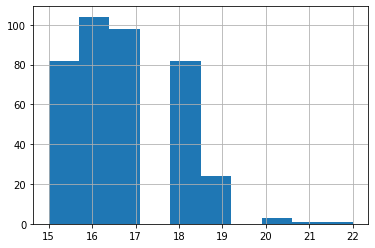

In [64]:
stud.age.hist()  # check for outliers. We can see 22 is outlier
stud.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


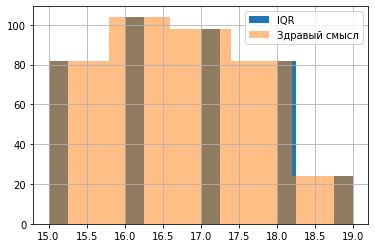

In [90]:
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.age.loc[stud.age.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (15, 19), label = 'IQR')
 
stud.age.loc[stud.age <= 19].hist(
alpha = 0.5, bins = 5, range = (15, 19), label = 'Здравый смысл')
 
plt.legend();

In [146]:
pd.DataFrame(stud.address.value_counts(dropna=False)) # more students live in the city
stud.address.value_counts() # get rid of all NaN

U    295
R     83
Name: address, dtype: int64

In [147]:
pd.DataFrame(stud.famsize.value_counts(dropna=False)) # more students with family size 3+
stud.famsize.value_counts(dropna=True) # get rid of all NaN

GT3    261
LE3    107
Name: famsize, dtype: int64

In [149]:
pd.DataFrame(stud.Pstatus.value_counts(dropna=False))  # more students live with parents
pd.DataFrame(stud.Pstatus.value_counts()) # get rid of all NaN

,Pstatus
T,314
A,36


In [150]:
pd.DataFrame(stud.Medu.value_counts(dropna=False))  # more students with mother's higher education
pd.DataFrame(stud.Medu.value_counts()) # get rid of all NaN

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


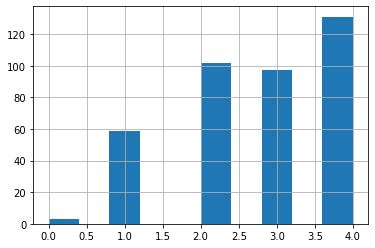

In [116]:
stud.Medu.hist()  # check for outliers. 

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


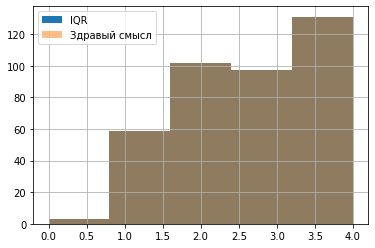

In [91]:
IQR = stud.Medu.quantile(0.75) - stud.Medu.quantile(0.25)
perc25 = stud.Medu.quantile(0.25)
perc75 = stud.Medu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.Medu.loc[stud.Medu.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
stud.Medu.loc[stud.Medu <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [151]:
pd.DataFrame(stud.Fedu.value_counts())  # more students with father's education 5-9 grades
stud.Fedu = stud.Fedu.apply(lambda x: 4.0 if x == 40.0 else x) # transfer typo error "40.0" to "4.0"
pd.DataFrame(stud.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

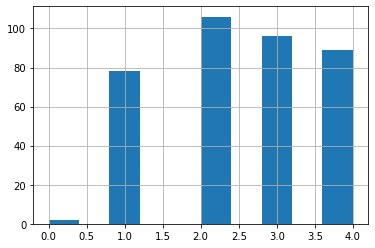

In [118]:
stud.Fedu.hist()  # check for outliers. We can see 0 , 40 are outliers
stud.Fedu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


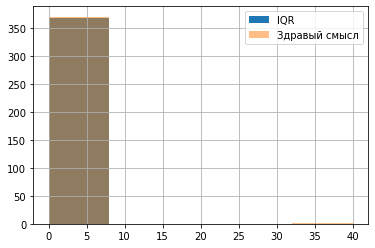

In [92]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.Fedu.loc[stud.Fedu.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 40), label = 'IQR')
 
stud.Fedu.loc[stud.Fedu <= 40].hist(
alpha = 0.5, bins = 5, range = (0, 40), label = 'Здравый смысл')
 
plt.legend();

In [152]:
pd.DataFrame(stud.Mjob.value_counts())  # more students with mother's job "other"

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [153]:
pd.DataFrame(stud.Fjob.value_counts())  # more students with father's job "other"

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [154]:
pd.DataFrame(stud.reason.value_counts())  # more students with reason "educational program"

,reason
course,137
home,104
reputation,103
other,34


In [155]:
pd.DataFrame(stud.guardian.value_counts())  # more students with guardian "mother"

,guardian
mother,250
father,86
other,28


In [156]:
pd.DataFrame(stud.traveltime.value_counts())  # more students with travel time < 15 min

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

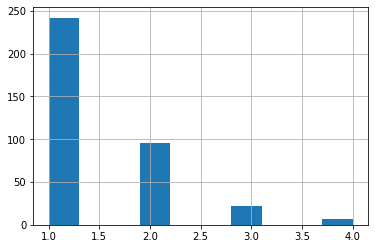

In [67]:
stud.traveltime.hist()  # check for outliers. 4 is outlier
stud.traveltime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


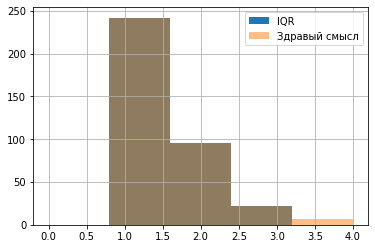

In [93]:
IQR = stud.traveltime.quantile(0.75) - stud.traveltime.quantile(0.25)
perc25 = stud.traveltime.quantile(0.25)
perc75 = stud.traveltime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.traveltime.loc[stud.traveltime.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
stud.traveltime.loc[stud.traveltime <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [157]:
pd.DataFrame(stud.studytime.value_counts())  # more students with additional studytime = 2-5 hours

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

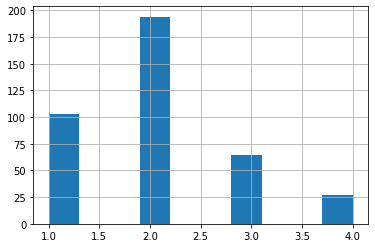

In [68]:
stud.studytime.hist()  # check for outliers. 4 is outlier
stud.studytime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


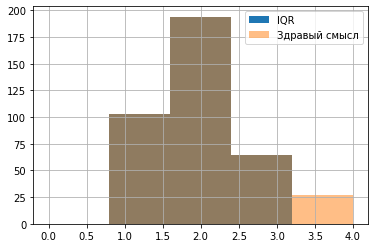

In [94]:
IQR = stud.studytime.quantile(0.75) - stud.studytime.quantile(0.25)
perc25 = stud.studytime.quantile(0.25)
perc75 = stud.studytime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.studytime.loc[stud.studytime.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
stud.studytime.loc[stud.studytime <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [158]:
pd.DataFrame(stud.failures.value_counts())  # more students with failures 0 or >3

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

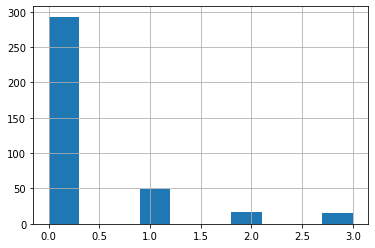

In [69]:
stud.failures.hist()  # check for outliers. 1,2,3 are outliers
stud.failures.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


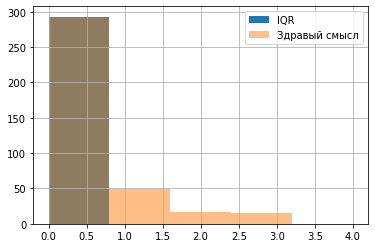

In [95]:
IQR = stud.failures.quantile(0.75) - stud.failures.quantile(0.25)
perc25 = stud.failures.quantile(0.25)
perc75 = stud.failures.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.failures.loc[stud.failures.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
stud.failures.loc[stud.failures <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [159]:
pd.DataFrame(stud.schoolsup.value_counts())  # more students without additional educational support

,schoolsup
no,335
yes,51


In [160]:
pd.DataFrame(stud.famsup.value_counts())  # more students with family aducational support

,famsup
yes,219
no,137


In [161]:
pd.DataFrame(stud.paid.value_counts())  # more students without additional paid math lessons

,paid
no,200
yes,155


In [162]:
pd.DataFrame(stud.activities.value_counts())  # more students with additional non-educational lessons

,activities
yes,195
no,186


In [163]:
pd.DataFrame(stud.nursery.value_counts())  # more students who attended day care

,nursery
yes,300
no,79


In [164]:
pd.DataFrame(stud.higher.value_counts())  # more students who want to have higher education

,higher
yes,356
no,19


In [165]:
pd.DataFrame(stud.internet.value_counts())  # more students with internet at home

,internet
yes,305
no,56


In [166]:
pd.DataFrame(stud.romantic.value_counts())  # more students without romantic dates

,romantic
no,240
yes,124


In [145]:
pd.DataFrame(stud.famrel.value_counts(dropna=False))  # more students with good family relationships
stud.famrel = stud.famrel.apply(lambda x: 1 if x == -1 else x) # replace -1 with 1(think it's typo)
stud.famrel = stud.famrel.apply(lambda x: stud.famrel.median() if pd.isna(x) else x) # replace all NaN with median
pd.DataFrame(stud.famrel.value_counts(dropna=False))

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

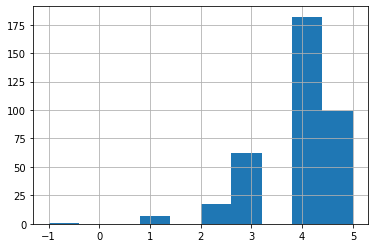

In [70]:
stud.famrel.hist()  # check for outliers. -1, 1, 2 are outliers
stud.famrel.describe()

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


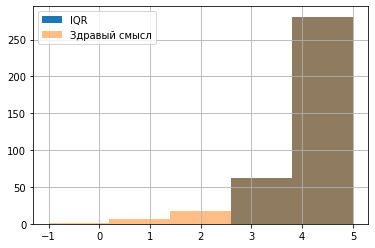

In [96]:
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.famrel.loc[stud.famrel.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (-1, 5), label = 'IQR')
 
stud.famrel.loc[stud.famrel <= 5].hist(
alpha = 0.5, bins = 5, range = (-1, 5), label = 'Здравый смысл')
 
plt.legend();

In [168]:
pd.DataFrame(stud.freetime.value_counts())  # more students with normal amount of free time

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

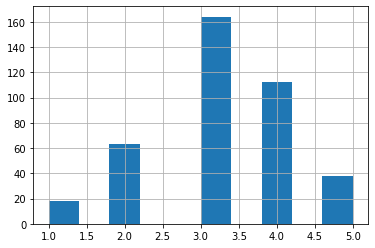

In [169]:
stud.freetime.hist()  # check for outliers. 1 is outlier
stud.freetime.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


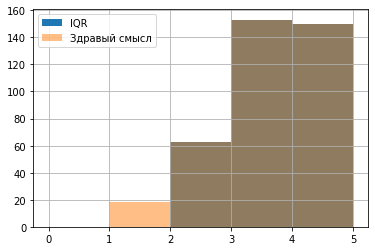

In [97]:
IQR = stud.freetime.quantile(0.75) - stud.freetime.quantile(0.25)
perc25 = stud.freetime.quantile(0.25)
perc75 = stud.freetime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.freetime.loc[stud.freetime.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
 
stud.freetime.loc[stud.freetime <= 5].hist(
alpha = 0.5, bins = 5, range = (0, 5), label = 'Здравый смысл')
 
plt.legend();

In [172]:
pd.DataFrame(stud.goout.value_counts())  # more students with normal amount of time with friends

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

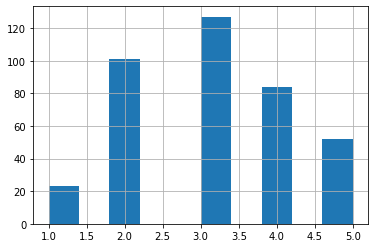

In [75]:
stud.goout.hist()  # check for outliers.
stud.goout.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


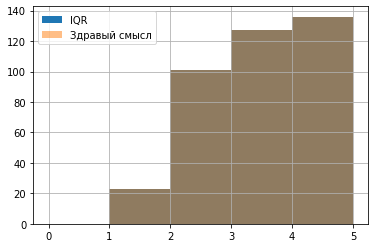

In [98]:
IQR = stud.goout.quantile(0.75) - stud.goout.quantile(0.25)
perc25 = stud.goout.quantile(0.25)
perc75 = stud.goout.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.goout.loc[stud.goout.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
 
stud.goout.loc[stud.goout <= 5].hist(
alpha = 0.5, bins = 5, range = (0, 5), label = 'Здравый смысл')
 
plt.legend();

In [173]:
pd.DataFrame(stud.health.value_counts())  # more students with great health

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

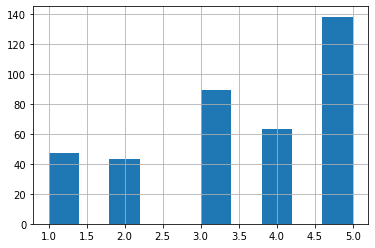

In [77]:
stud.health.hist()  # check for outliers.
stud.health.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


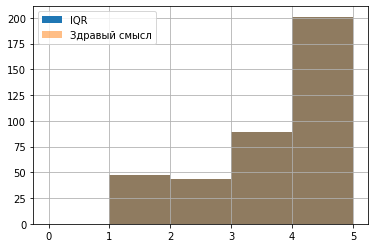

In [99]:
IQR = stud.health.quantile(0.75) - stud.health.quantile(0.25)
perc25 = stud.health.quantile(0.25)
perc75 = stud.health.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.health.loc[stud.health.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
 
stud.health.loc[stud.health <= 5].hist(
alpha = 0.5, bins = 5, range = (0, 5), label = 'Здравый смысл')
 
plt.legend();

In [174]:
display(pd.DataFrame(stud.absences.value_counts()))  # more students with 0 absences
print("Значений, встретившихся в столбце более 10 раз:"
      , (stud.absences.value_counts()>10).sum())
stud.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

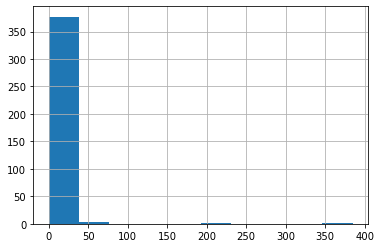

In [176]:
stud.absences.hist()  # check for outliers. Everything > 20 - outliers
stud.absences.describe() 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


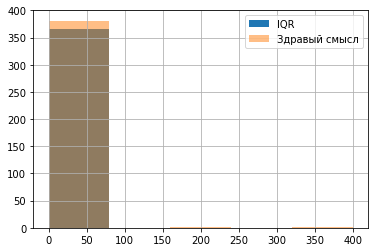

In [100]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 400), label = 'IQR')
 
stud.absences.loc[stud.absences <= 400].hist(
alpha = 0.5, bins = 5, range = (0, 400), label = 'Здравый смысл')
 
plt.legend();

In [175]:
display(pd.DataFrame(stud.score.value_counts()))  # more students with score 50

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

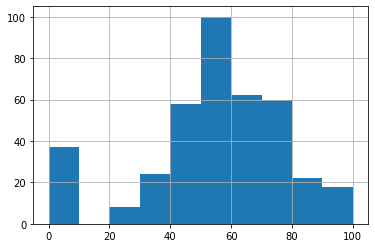

In [86]:
stud.score.hist()  # check for outliers. 0 is outlier
stud.score.describe() 

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


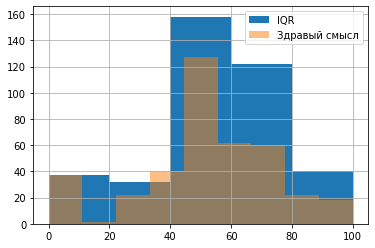

In [102]:
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.score.loc[stud.score.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 100), label = 'IQR')
 
stud.score.loc[stud.score <= 100].hist(
alpha = 0.5, bins = 9, range = (0, 100), label = 'Здравый смысл')
 
plt.legend();

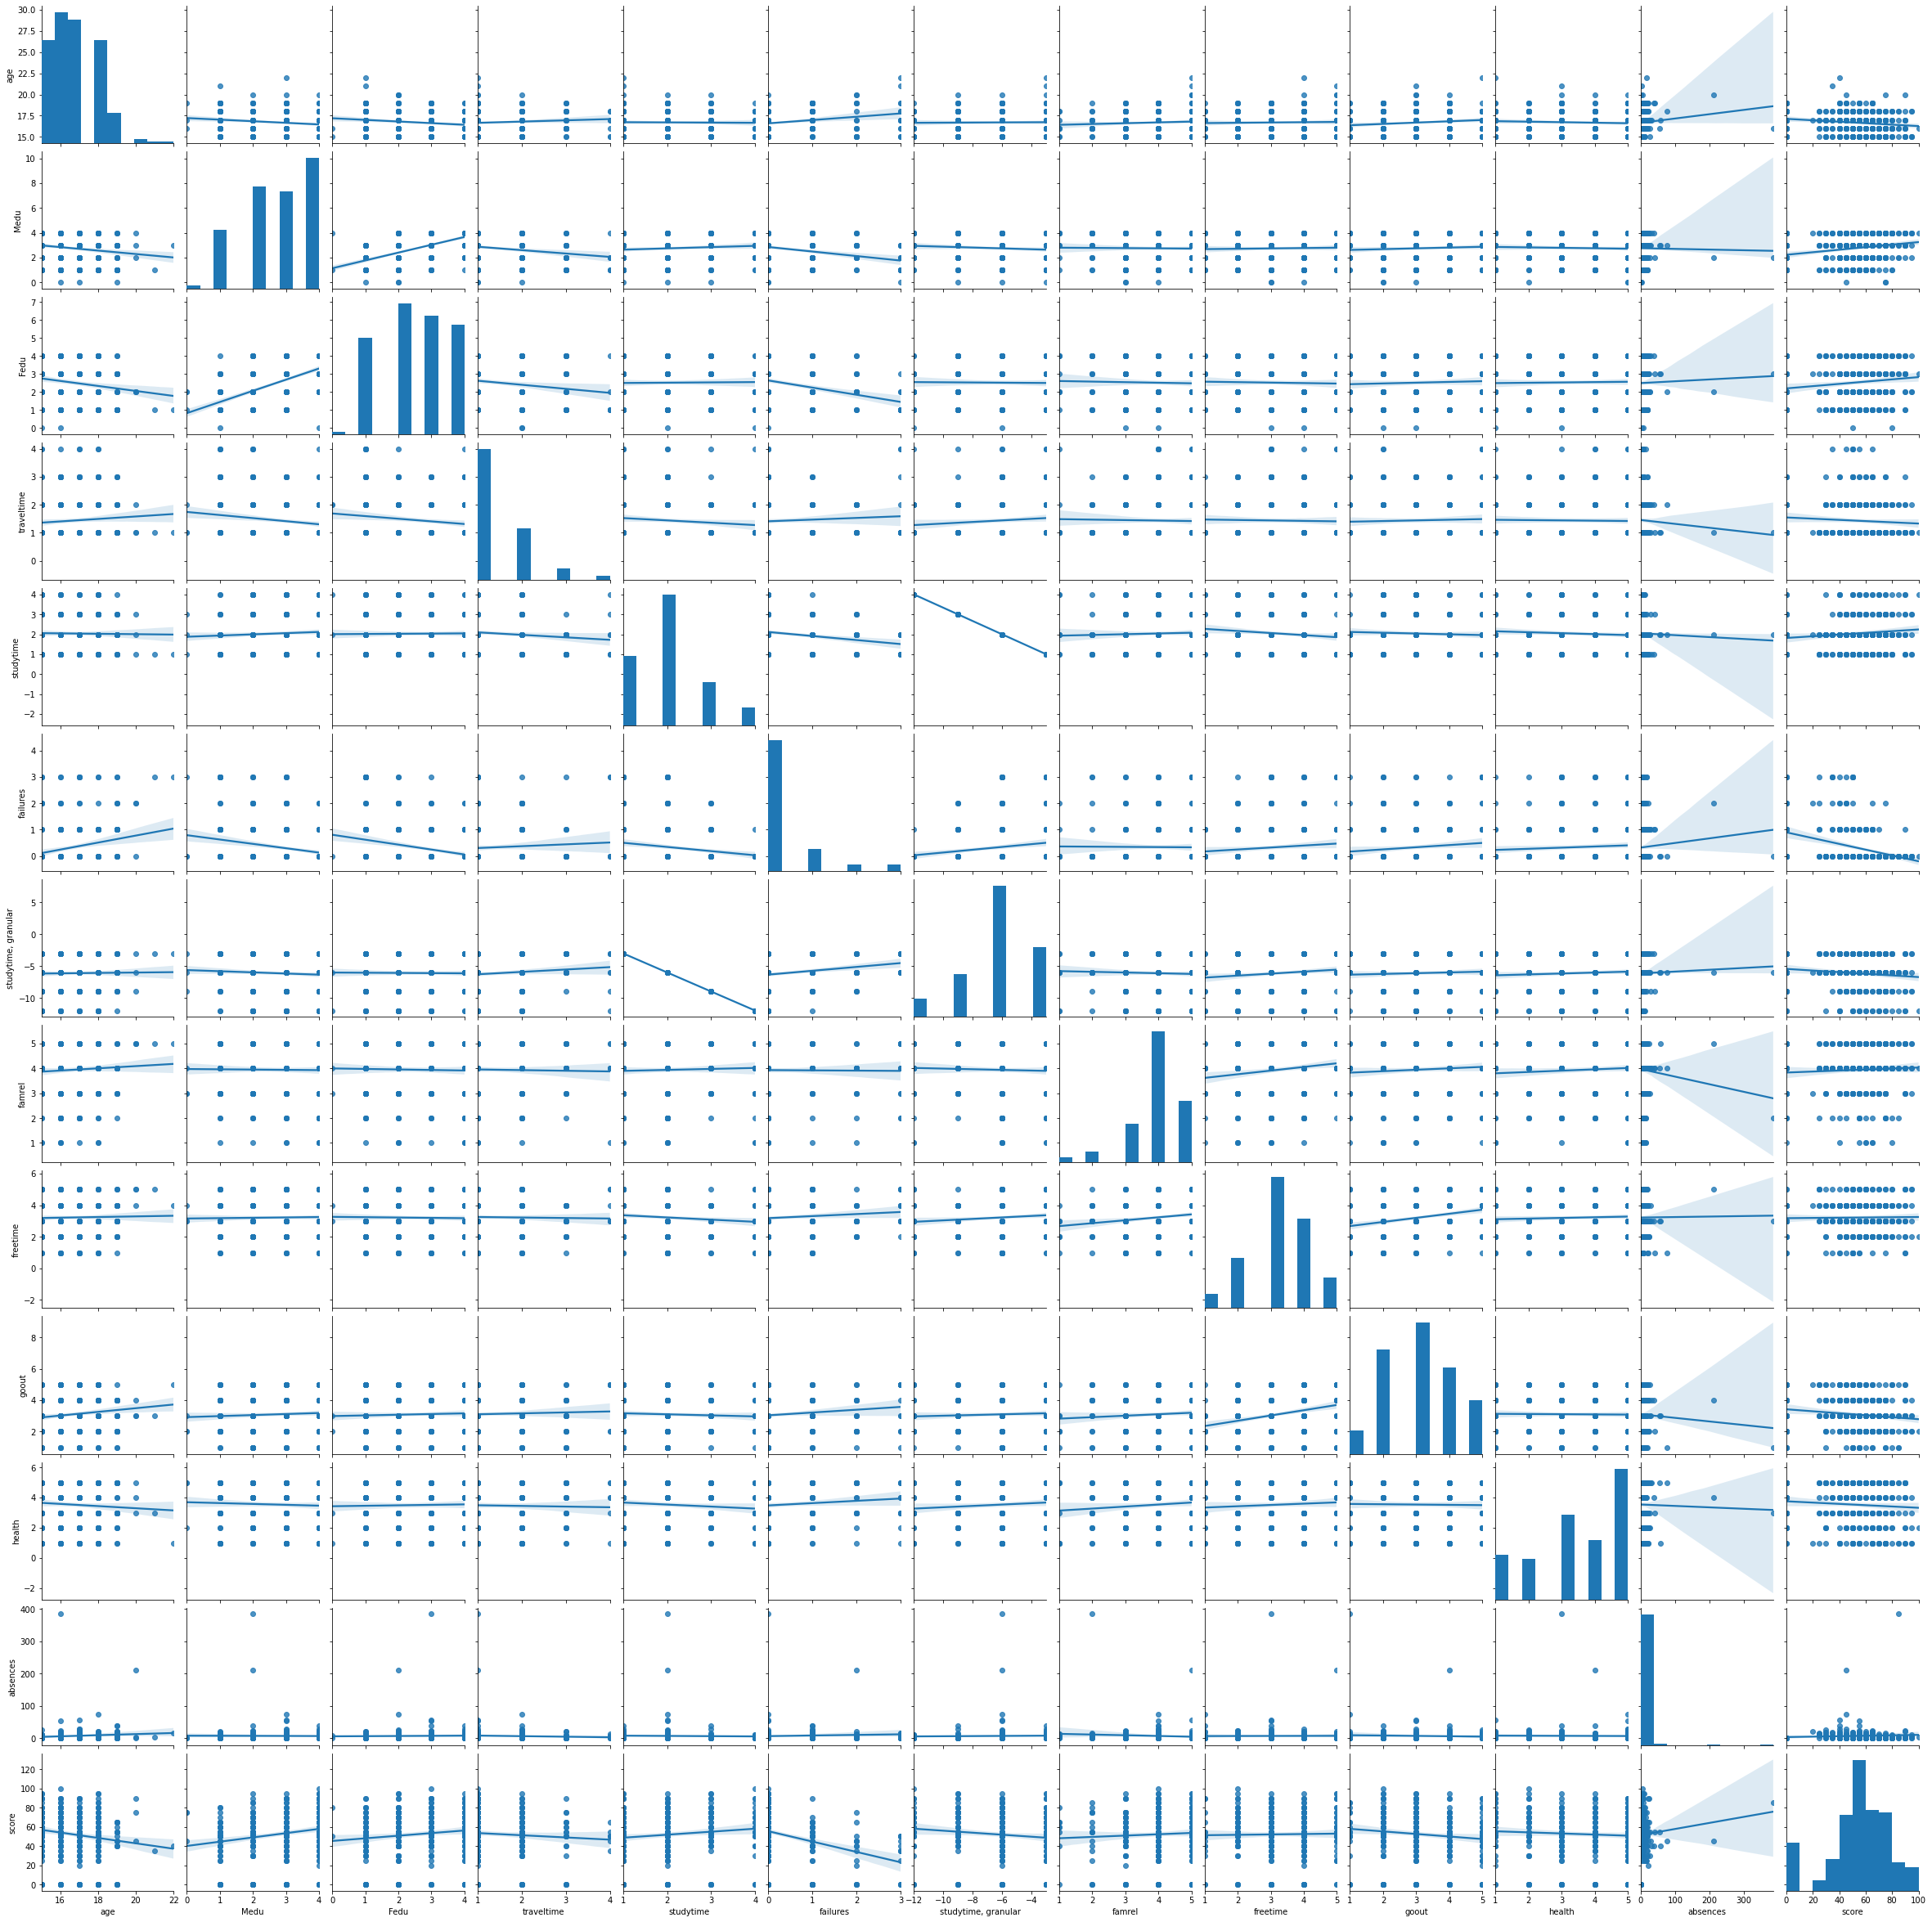

In [177]:
sns.pairplot(stud, kind = 'reg')

In [178]:
stud.corr() # There is no full correlation between any columns, so I will not drop any


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.065250,0.026443,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014009,0.025542,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.025702,-0.023584,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021297,-0.022660,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.038152,-0.120774,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009241,0.098578,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.038152,0.120774,0.051280,0.080016,0.026544,-0.115741
famrel,0.065250,-0.014009,-0.025702,-0.021297,0.038152,-0.009241,-0.038152,1.000000,0.165324,0.073841,0.084233,-0.081882,0.052902
freetime,0.026443,0.025542,-0.023584,-0.022660,-0.120774,0.098578,0.120774,0.165324,1.000000,0.295648,0.059810,0.007509,0.017481
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.073841,0.295648,1.000000,-0.015608,-0.048738,-0.129685


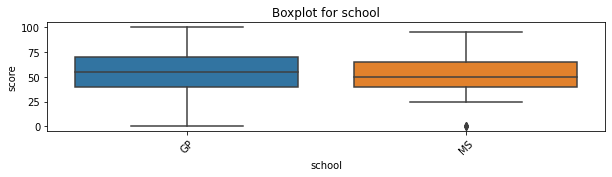

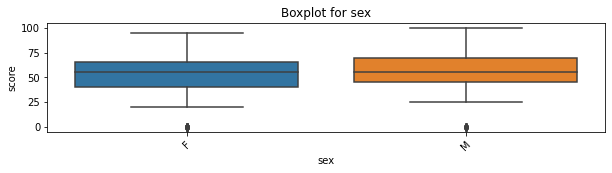

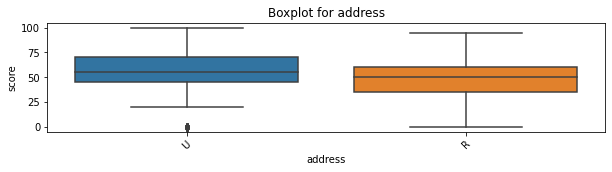

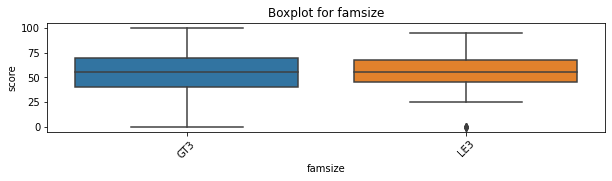

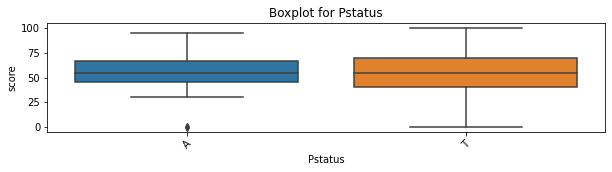

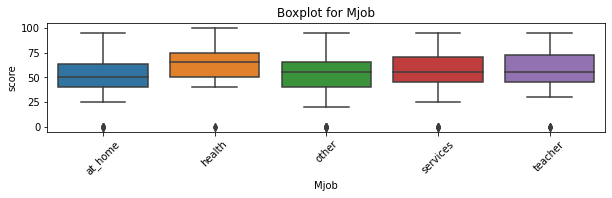

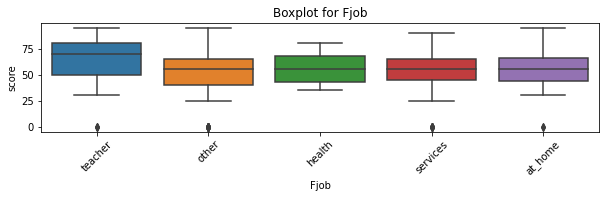

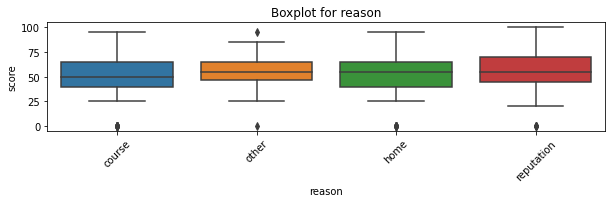

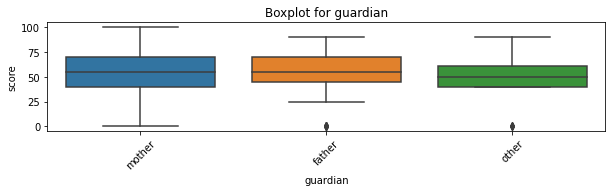

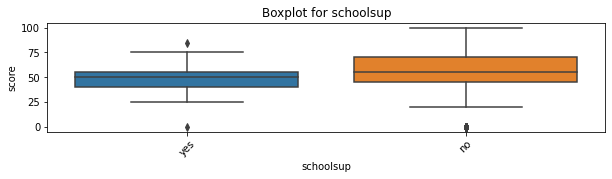

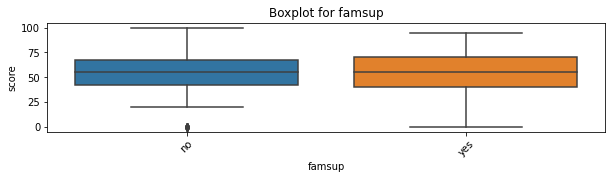

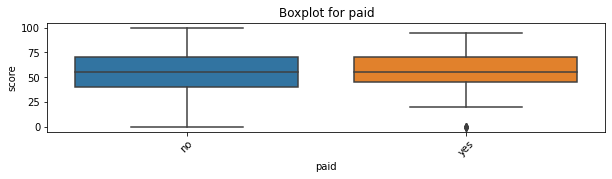

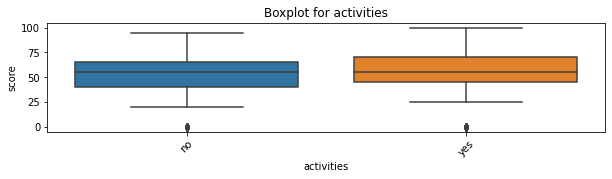

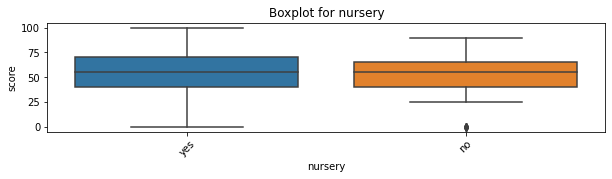

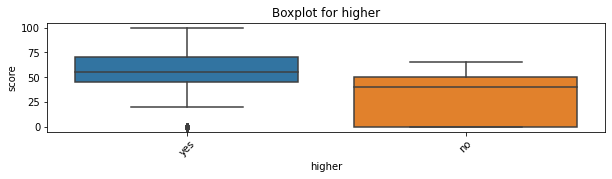

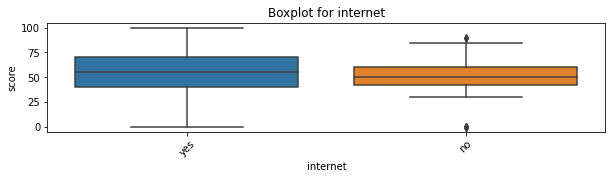

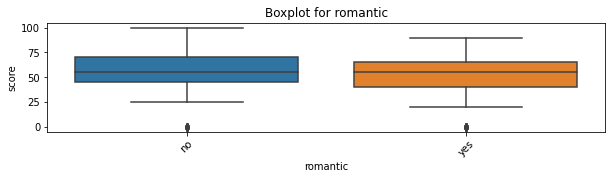

In [185]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 2))
    sns.boxplot(x=column, y='score', 
                data = stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob',\
            'reason','guardian','schoolsup','famsup','paid','activities','nursery',\
           'higher','internet','romantic']:
    get_boxplot(col)
    
    # we can see that each column can influence on score

In [186]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # amendment Bonferoni
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob',\
            'reason','guardian','schoolsup','famsup','paid','activities','nursery',\
           'higher','internet','romantic']:
    get_stat_dif(col)
    
   # I will include in model Mjob

Найдены статистически значимые различия для колонки Mjob


C:\Users\Tony\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [187]:
# for future model we will use Mjob, age, Medu, Fedu, traveltime,
#studytime, failures, famrel, freetime, goout, health, absences. 
# These columns can influence on score results
#quality of data could be better - too many NaN's

stud_model = stud.loc[:,['Mjob','age','Medu','Fedu','traveltime',\
                         'studytime','failures','famrel','freetime',\
                         'goout','health','absences']]
stud_model.head()




,Mjob,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,at_home,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,at_home,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,at_home,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,health,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,other,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0
